# Covid Dataset Generator

Script Diseñado para obtener información de casos confirmados, muertes y recuperados del Covid-19 para Colombia e Italia a partir de los datos provistos por la API:

https://covid-api.quintessential.gr



#Desarrollado por:
## Alejandro Mesa Gómez <a href="https://twitter.com/cosmolejo"> @Cosmolejo</a> <a href="https://github.com/cosmolejo/"> Github</a>


<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Licencia Creative Commons Atribución 4.0 Internacional</a>.


# Paquetes

In [0]:
import pandas as pd
import requests
import numpy as np
import datetime
import progressbar

# Inicialización de arreglos y fecha inicial



In [0]:
# Italy
itCases = [] #casos
itDeaths = [] #muertes
itRec = [] # recuperados

# Colombia

colCases=[] 
colDeaths=[]
colRec = []

In [0]:
dateinit=datetime.datetime(2020, 1, 31)

# Fecha final de la consulta


In [0]:
datefin=datetime.datetime(2020, 3, 26)

# Arreglo de fechas

In [0]:
def dateGenerator():
    date=dateinit
    while date != datefin:
        yield f"{date.month}-{date.day}-{date.year}"
        date+=datetime.timedelta(days=1)

fechasit=[i for i in dateGenerator()]


# Función de consulta



In [0]:
def query(fecha,pais):
  """Función de consulta de la api para obtener datos del covid 19
     
     fecha= objeto tipo datetime
     pais = string con el nombre del pais en ingles, todo en minusculas

     retorno: (casos confirmados, muertes, recuperados)
  """
  response= requests.get(f'https://covid-api.quintessential.gr/data/custom?country={pais}&date={fecha.month}-{fecha.day}-{fecha.year}')
  response.encoding = 'utf-8' # Optional: requests infers this internally
  if(response.text=='[]'):
    return (0,0,0)
  else:
    vals=response.json()[0]
    
    return eval(vals["Confirmed"]),0 if vals["Deaths"] == '' else eval(vals["Deaths"]) ,0 if vals["Recovered"] == '' else eval(vals["Recovered"])

# Llenado de los arreglos


In [38]:
date = dateinit
fechascol=[]
with progressbar.ProgressBar(max_value=55) as bar:
  i=0
  while(date != datefin):

    # Italy
    response=query(date,"Italy")
    itCases.append(response[0])
    itDeaths.append(response[1])
    itRec.append(response[2])
    
    #Colombia
    response=query(date,"colombia")
    if(response != (0,0,0)):
      colCases.append(response[0])
      colDeaths.append(response[1])
      colRec.append(response[2])
      fechascol.append(date)

    bar.update(i)
    i+=1
    date+=datetime.timedelta(days=1)

100% (55 of 55) |########################| Elapsed Time: 0:00:29 Time:  0:00:29


# Visualización

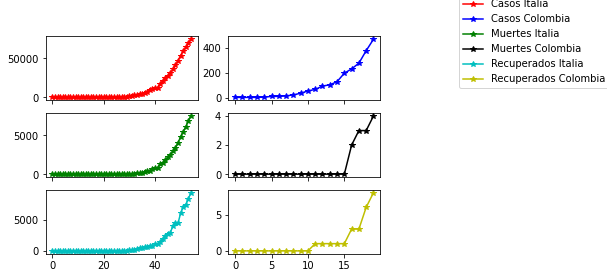

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots(3, 2, sharex='col')


ax[0,0].plot(itCases, 'r-*',label="Casos Italia")
ax[0,1].plot(colCases, 'b-*',label="Casos Colombia")


ax[1,0].plot(itDeaths, 'g-*',label="Muertes Italia")
ax[1,1].plot(colDeaths, 'k-*',label="Muertes Colombia")
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2,0].plot(itRec, 'c-*',label="Recuperados Italia")
ax[2,1].plot(colRec, 'y-*',label="Recuperados Colombia")
#ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Conversión a Dataset

In [0]:
datait= pd.DataFrame(list(zip(itCases,itDeaths,itRec)),columns=["Casos","Muertes","Recuperados"])
datacol= pd.DataFrame(list(zip(colCases,colDeaths,colRec)),columns=["Casos","Muertes","Recuperados"])

# Factor de infección

In [0]:
datait["Factor"]=0
for i in range(1, len(datait)):
    datait.loc[i, 'Factor'] = datait.loc[i, 'Casos']/ datait.loc[i-1, 'Casos'] 
datait.index=fechasit
datacol["Factor"]=0
for i in range(1, len(datacol)):
    datacol.loc[i, 'Factor'] = datacol.loc[i, 'Casos']/ datacol.loc[i-1, 'Casos']
datacol.index=fechascol

Text(0.5, 1.0, 'Factor de infección Italia')

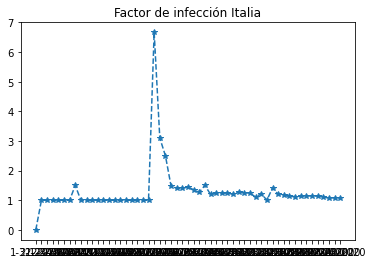

In [77]:
plt.plot(datait.Factor,'--*')
plt.title("Factor de infección Italia")

Text(0.5, 1.0, 'Factor de infección Colombia')

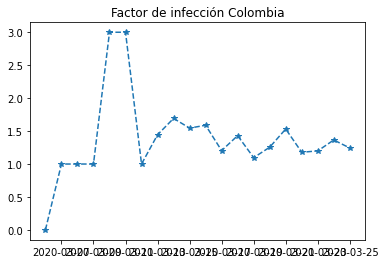

In [78]:
plt.plot(datacol.Factor,'--*')
plt.title("Factor de infección Colombia")

# Descarga de Datasets resultantes

In [0]:
datait.to_excel("italia.xlsx")
datacol.to_excel("colombia.xlsx")